In [2]:
import jaxrl_m.envs
import gym
import numpy as np
import d4rl

No module named 'flow'
No module named 'carla'
pybullet build time: Nov 28 2023 23:51:11


In [3]:
env = gym.make("maze2d-twogoals-mode0-v0")

In [4]:
import numpy as np
from d4rl.pointmaze import q_iteration
from d4rl.pointmaze.gridcraft import grid_env
from d4rl.pointmaze.gridcraft import grid_spec

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

[7 1]


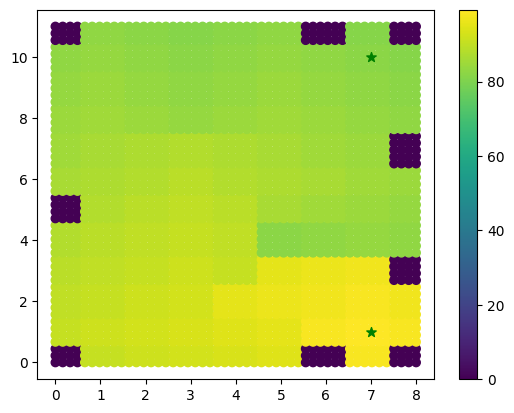

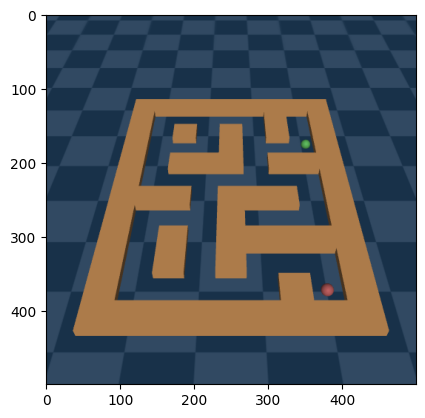

In [10]:

def gridify_state(state):
    return (int(round(state[0])), int(round(state[1])))
maze_env = grid_env.GridEnv(grid_spec.spec_from_string(env.unwrapped.env.str_maze_spec))
maze_env.gs[gridify_state(env.target)] = grid_spec.REWARD
print(env.target)
q_values = q_iteration.q_iteration(env=maze_env, num_itrs=500, discount=0.99)
# compute waypoints by performing a rollout in the grid
max_ts = 100
obs = env.get_obs_grid()
obs_grid = np.array([gridify_state(o) for o in obs])
obs_id = [maze_env.gs.xy_to_idx(o) for o in obs_grid]
# print(obs_id)
r = np.max(q_values[obs_id], axis=1)
# r = q_values[obs_id][:, 1]

# plt.figure()
# plt.hist(r, bins=100)
# plt.show()

def plot_observation_rewards(obs, r, no_norm=False):
    fig, ax = plt.subplots()
    # rs = np.array([r[i] for i in range(len(r)) if maze_env.gs[obs_grid[i]] != grid_spec.WALL])
    # r = (r - rs.min()) / (rs.max() - rs.min())
    # r = np.array([r[i] if maze_env.gs[obs_grid[i]] != grid_spec.WALL else 0 for i in range(len(r))])
    # r = np.exp(r / 0.1)
    # if no_norm:
    #     norm = matplotlib.colors.NoNorm()
    # else:
    #     norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
    # r = (r - r.min()) / (r.max() - r.min())
    sc = ax.scatter(obs[:, 0], obs[:, 1], c=r)
    plt.colorbar(sc)
    env.plot_goals(ax)
    # plt.close(fig)
    plt.show()
    # return fig

# fig, ax = plt.subplots()
# r = (r - r.min()) / (r.max() - r.min())
# print(obs.shape, r.shape)
# ax.scatter(obs[:, 0], obs[:, 1], c=r)
# env.plot_goals(ax)
plot_observation_rewards(obs, r, True)
env.reset()
env.step(env.action_space.sample())
plt.imshow(env.render("rgb_array"))
# print(maze_env.gs)

In [68]:
maze_env.gs[0]

TypeError: cannot unpack non-iterable int object

In [7]:
env.reset()
ims = []
for t in range(10):
    im = env.render(mode="rgb_array")
    # print(im)
    ims.append(im)
    env.step(np.ones_like(env.action_space.sample()) * 0.01 * t)

print("Test passed!\n\n")

Test passed!




In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# np array with shape (frames, height, width, channels)
video = np.array(ims)

fig = plt.figure()
im = plt.imshow(video[0,:,:,:])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())